In [47]:
# Задание 1

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import load_boston

In [50]:
boston = load_boston()

In [51]:
data = boston["data"]
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [52]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [53]:
X = pd.DataFrame(data, columns=feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [54]:
target = boston["target"]
y = pd.DataFrame(target, columns=['price'])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [61]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

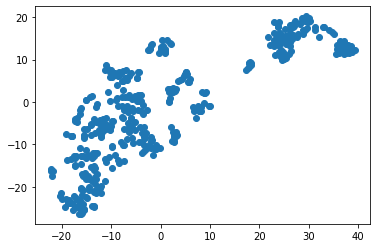

In [62]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [63]:
# Задание 2

In [64]:
from sklearn.cluster import KMeans

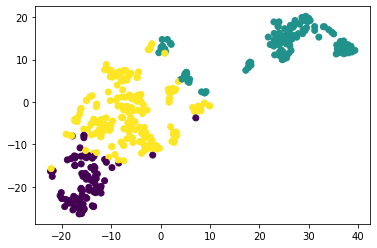

In [65]:
model = KMeans(n_clusters=3, random_state=100, max_iter=100)
train_labels = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [66]:
print('Первый кластер: ', y_train[train_labels == 0].mean())
print('Второй кластер:', y_train[train_labels == 1].mean())
print('Третий кластер:', y_train[train_labels == 2].mean())

Первый кластер:  price    27.788372
dtype: float64
Второй кластер: price    16.179688
dtype: float64
Третий кластер: price    24.994737
dtype: float64


In [67]:
print('Первый кластер: ', X_train['CRIM'][train_labels == 0].mean())
print('Второй кластер:', X_train['CRIM'][train_labels == 1].mean())
print('Третий кластер:', X_train['CRIM'][train_labels == 2].mean())

Первый кластер:  0.07356558139534886
Второй кластер: 10.715219062500003
Третий кластер: 0.4221666842105262


In [68]:
# Задание 3

In [69]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [70]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

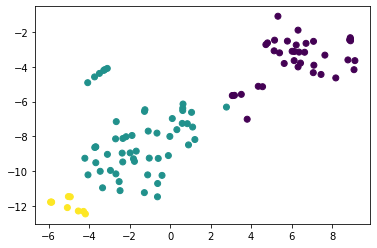

In [74]:
test_labels = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [75]:
print('Первый кластер: ', X_test['CRIM'][test_labels == 0].mean())
print('Второй кластер:', X_test['CRIM'][test_labels == 1].mean())
print('Третий кластер:', X_test['CRIM'][test_labels == 2].mean())

Первый кластер:  9.419181842105264
Второй кластер: 0.21929690909090907
Третий кластер: 0.04070333333333334
